<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Discretización por Kmeans </font> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('Data/dataKmeans.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1500000 non-null  float64
 1   y       1500000 non-null  float64
dtypes: float64(2)
memory usage: 22.9 MB


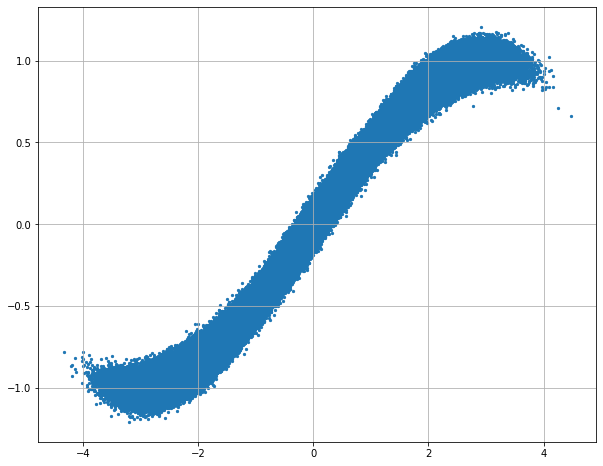

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(df.x,df.y, s=5)
plt.grid()

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

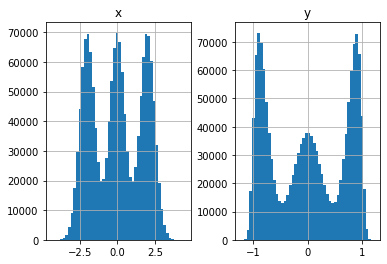

In [6]:
df.hist(bins=50)

In [8]:
#@title Discretización con K-means
#
# Centroides
k=3
ctr = np.random.uniform(df.x.min(), df.x.max(),k)
ctr

array([ 3.03462811, -0.62803397,  1.58733477])

In [9]:
dif=[]
for c_i in ctr:
    dif.append(np.abs(c_i - df[['x']].values))
distancias = np.concatenate(dif, axis=1)
grupos = np.argmin(distancias, axis=1)
df_copia = df.copy()
df_copia['kmeans']=grupos
df_copia.groupby('kmeans')['x'].mean()


kmeans
0    2.615185
1   -1.160150
2    1.584671
Name: x, dtype: float64

In [12]:
df_copia.head()

,x,y,kmeans
0,-1.905967,-0.780757,1
1,-2.934568,-0.955310,1
2,-2.178603,-0.960997,1
3,-1.870977,-0.791746,1
4,-2.513686,-0.968655,1


In [13]:
df_copia['kmeans'].value_counts()

1    916031
2    450406
0    133563
Name: kmeans, dtype: int64

kmeans
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: x, dtype: object

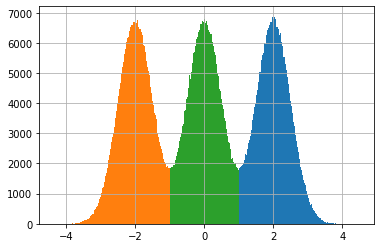

In [15]:
ctr_anterior=np.ones(k)*np.inf
eps = 1e-6
while(np.abs(ctr - ctr_anterior).sum()>eps):
    dif=[]
    for c_i in ctr:
        dif.append(np.abs(c_i - df[['x']].values))
    distancias = np.concatenate(dif,axis=1)
    grupos = np.argmin(distancias, axis=1)
    df_copia = df.copy()
    df_copia['kmeans']=grupos
    ctr_anterior = ctr.copy()
    ctr = df_copia.groupby('kmeans')['x'].mean().values

df['kmeans'] = grupos
df.groupby('kmeans')['x'].hist(bins='auto')


In [16]:
#@title Regresiones
#
# Modelo con datos sin discretizar
lin_SD = LinearRegression()
lin_SD.fit(df[['x']], df[['y']])
predict_SD = lin_SD.predict(df[['x']])

# Modelo con datos discretizados con K-means
lin_kmeans=LinearRegression()
x = ctr.reshape(-1,1)
y = df.groupby('kmeans')['y'].mean()
lin_kmeans.fit(x,y)
predict_kmeans=lin_kmeans.predict(df[['x']].values)



In [20]:
df.shape

(1500000, 3)

In [18]:
x

array([[ 2.00995408e+00],
       [-2.01017736e+00],
       [ 7.44339211e-04]])

In [19]:
y

kmeans
0    0.819981
1   -0.819710
2    0.000496
Name: y, dtype: float64

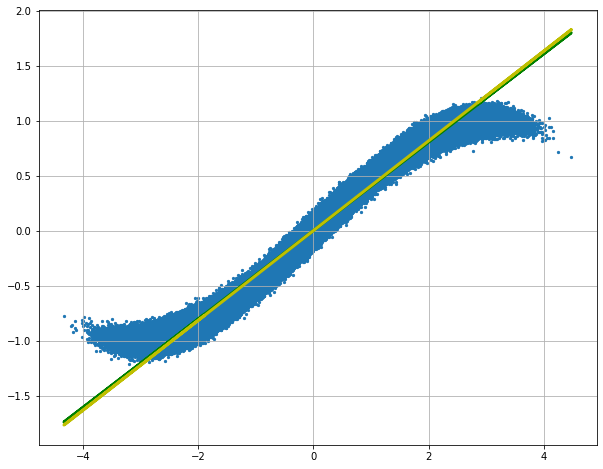

In [17]:
#Graficar los modelos vs datos originales
plt.figure(figsize=(10,8))
plt.scatter(df.x,df.y, s=5)
plt.plot(df.x, predict_SD, 'g', label='Regresión con datos originales', lw=3)
plt.plot(df.x, predict_kmeans, 'y', label='Regresión con datos discretizados por kmeans', lw=3)
plt.grid()

In [22]:
# Modelo con datos sin discretizar
lin_SD.coef_, lin_SD.intercept_

(array([[0.40165508]]), array([0.00018649]))

In [23]:
# Modelo con datos discretizados usando K-means
lin_kmeans.coef_, lin_kmeans.intercept_

(array([0.40786998]), 0.0001852183640434627)

### Modelos resultantes
Modelo con datos sin discretizar
$$
y=0.4017x+0.000186
$$
Modelo con datos discretizados usando K-means
$$
y=0.4079x+0.000185
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


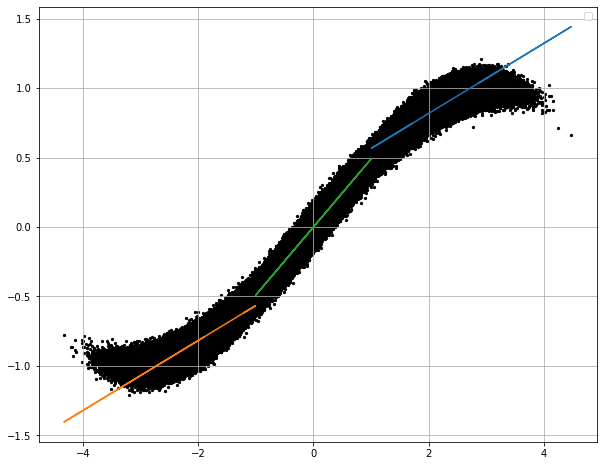

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(df.x,df.y,c='k', s=5)
lin_centroides=[]
for c_i in range(k):
    x = df[df['kmeans']==c_i][['x']].values
    y = df[df['kmeans']==c_i][['y']].values
    lin_centroides.append(LinearRegression())
    lin_centroides[-1].fit(x,y)
    plt.plot(x,lin_centroides[-1].predict(x))
plt.legend()
plt.grid()
plt.show()